# Problema de Negócio: Análise de Desempenho de Vendas por Segmento, Região e Categoria de Produto

Uma empresa de varejo internacional deseja analisar o desempenho de suas vendas com base nos segmentos de clientes, regiões de atuação e categorias de produtos. A empresa possui dados históricos de vendas que incluem informações sobre os clientes, os produtos vendidos e o valor das vendas em diferentes regiões e categorias de produtos.

#### Objetivo:
- Descobrir quantos Países e regiões temos e determinar qual é o País e a região que mais contribuiu para o faturamento total da empresa e qual o País e a região que menos contribuiu para o faturamento total, seguido com valores.
- Identificar qual categoria de produto é a mais vendida e se alguma categoria se destaca em termos de receita.
- Identificar quais segmentos de clientes estão gerando mais receita e quais regiões têm o melhor desempenho de vendas.

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
# Carregando dados
dados = pd.read_csv(r'C:\Users\alexf\OneDrive\Área de Trabalho\Portfolio\Projeto1-JN-Python\projeto01.csv', delimiter=';')

In [4]:
# Visualizando as primeiras linhas dos dados
print(dados.head())

  ID_Cliente     Segmento           Regiao           Pais        ID_Produto  \
0   RH-19495   Consumidor         New York  United States   TEC-AC-10003033   
1   JR-16210  Corporativo  New South Wales      Australia   FUR-CH-10003950   
2   CR-12730   Consumidor       Queensland      Australia   TEC-PH-10004664   
3   KM-16375  Home Office           Berlin        Germany   TEC-PH-10004583   
4    RH-9495   Consumidor            Dakar        Senegal  TEC-SHA-10000501   

    Categoria  Quantidade_Produtos Valor_Venda  
0  Tecnologia                    7     2309,65  
1      Moveis                    9    3709,395  
2  Tecnologia                    9    5175,171  
3  Tecnologia                    5     2892,51  
4  Tecnologia                    8     2832,96  


In [5]:
# Obtendo informações sobre os tipos de dados e valores nulos
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_Cliente           51290 non-null  object
 1   Segmento             51290 non-null  object
 2   Regiao               51290 non-null  object
 3   Pais                 51290 non-null  object
 4   ID_Produto           51290 non-null  object
 5   Categoria            51290 non-null  object
 6   Quantidade_Produtos  51290 non-null  int64 
 7   Valor_Venda          51290 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.1+ MB
None


In [6]:
# Verificando os valores únicos na coluna "Valor_Venda" pois deveria ser do tipo float
print(dados['Valor_Venda'].unique())

['2309,65' '3709,395' '5175,171' ... '20,416' '1,624' '0,444']


In [7]:
# Substituir as vírgulas por pontos e converter para tipo float
dados['Valor_Venda'] = dados['Valor_Venda'].str.replace(',', '.').astype(float)

# Verificar novamente os tipos de dados após a conversão
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Cliente           51290 non-null  object 
 1   Segmento             51290 non-null  object 
 2   Regiao               51290 non-null  object 
 3   Pais                 51290 non-null  object 
 4   ID_Produto           51290 non-null  object 
 5   Categoria            51290 non-null  object 
 6   Quantidade_Produtos  51290 non-null  int64  
 7   Valor_Venda          51290 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.1+ MB
None


In [9]:
# Calculando o número total de vendas
total_vendas = len(dados)
print("Total de vendas:", total_vendas)

Total de vendas: 51290


Agora já temos algumas informações:

- As colunas são: ID_Cliente, Segmento, Região, País, ID_Produto, Categoria, Quantidade_Produtos e Valor_Venda.
- Tipos de dados das colunas.
- Número total de vendas.

# Objetivo 1

### Descobrir quantos Países e regiões temos e determinar qual é o País e a região que mais contribuiu para o faturamento total da empresa e qual o País e a região que menos contribuiu para o faturamento total, seguido com valores.

In [10]:
# Descobrindo para quantos Países a empresa vendeu, contando o número de valores únicos
num_pais = dados['Pais'].nunique()

print("Número de Países:", num_pais)

Número de Países: 147


In [11]:
# Agrupando os dados por País e calculando o faturamento total de vendas para cada País
faturamento_pais = dados.groupby('Pais')['Valor_Venda'].sum().reset_index()

In [12]:
# Identificando o País com maior e menor faturamento
pais_maior_faturamento = faturamento_pais.loc[faturamento_pais['Valor_Venda'].idxmax()]
pais_menor_faturamento = faturamento_pais.loc[faturamento_pais['Valor_Venda'].idxmin()]

print("O País com maior faturamento foi", pais_maior_faturamento['Pais'], "com faturamento total de:", pais_maior_faturamento['Valor_Venda'])
print("O País com menor faturamento foi", pais_menor_faturamento['Pais'], "com faturamento total de:", pais_menor_faturamento['Valor_Venda'])

O País com maior faturamento foi United States com faturamento total de: 2297200.8603
O País com menor faturamento foi Equatorial Guinea com faturamento total de: 150.51


In [13]:
# Descobrindo para quantas regiões a empresa vendeu, contando o número de valores únicos
num_regioes = dados['Regiao'].nunique()

print("Número de Regiões:", num_regioes)

Número de Regiões: 1094


In [14]:
# Agrupando os dados por região e calculando o faturamento total de vendas para cada região
faturamento_regiao = dados.groupby('Regiao')['Valor_Venda'].sum().reset_index()

In [15]:
# Identificar a região com maior e menor faturamento
regiao_maior_faturamento = faturamento_regiao.loc[faturamento_regiao['Valor_Venda'].idxmax()]
regiao_menor_faturamento = faturamento_regiao.loc[faturamento_regiao['Valor_Venda'].idxmin()]

print("A Região com maior faturamento foi", regiao_maior_faturamento['Regiao'], "com faturamento total de:", regiao_maior_faturamento['Valor_Venda'])
print("A Região com menor faturamento foi", regiao_menor_faturamento['Regiao'], "com faturamento total de:", regiao_menor_faturamento['Valor_Venda'])

A Região com maior faturamento foi England com faturamento total de: 485170.971
A Região com menor faturamento foi Matabeleland North com faturamento total de: 3.465


In [16]:
# Identificando o País com maior e menor faturamento
pais_maior_faturamento = faturamento_pais.loc[faturamento_pais['Valor_Venda'].idxmax()]
pais_menor_faturamento = faturamento_pais.loc[faturamento_pais['Valor_Venda'].idxmin()]

print("O País com maior faturamento foi", pais_maior_faturamento['Pais'], "com faturamento total de:", pais_maior_faturamento['Valor_Venda'])
print("O País com menor faturamento foi", pais_menor_faturamento['Pais'], "com faturamento total de:", pais_menor_faturamento['Valor_Venda'])

O País com maior faturamento foi United States com faturamento total de: 2297200.8603
O País com menor faturamento foi Equatorial Guinea com faturamento total de: 150.51


## Conclusão - Objetivo 1

### Após analisar os dados, foi concluído que a empresa vendeu para 147 Países e 1094 Regiões diferentes, sendo:
- O País com maior faturamento foi United States com faturamento total de: 2297200.8603
- O País com menor faturamento foi Equatorial Guinea com faturamento total de: 150.51
- A Região com maior faturamento foi England com faturamento total de: 485170.971
- A Região com menor faturamento foi Matabeleland North com faturamento total de: 3.465

# Objetivo 2

#### Identificar qual categoria de produto é a mais vendida e se alguma categoria se destaca em termos de receita.

In [17]:
# Agrupando os dados por categoria e calculando o valor de vendas por cada categoria
vendas_por_categoria = dados.groupby('Categoria').agg({'Quantidade_Produtos': 'sum', 'Valor_Venda': 'sum'}).reset_index()
print(vendas_por_categoria)

     Categoria  Quantidade_Produtos   Valor_Venda
0       Moveis                34954  4.110874e+06
1  Suprimentos               108182  3.787070e+06
2   Tecnologia                35176  4.744557e+06


In [18]:
# Formatando os valores de 'Valor_Venda' para evitar a notação científica
vendas_por_categoria['Valor_Venda'] = vendas_por_categoria['Valor_Venda'].map('{:.2f}'.format)

In [19]:
print(vendas_por_categoria)

     Categoria  Quantidade_Produtos Valor_Venda
0       Moveis                34954  4110874.19
1  Suprimentos               108182  3787070.23
2   Tecnologia                35176  4744557.50


In [20]:
categoria_mais_vendida = dados.groupby('Categoria')['Valor_Venda'].sum().reset_index()

In [21]:
# Encontrando a categoria mais vendida e o total de vendas
categoria_mais_vendida = dados.groupby('Categoria')['Valor_Venda'].sum().idxmax()
total_vendas_categoria = dados.groupby('Categoria')['Valor_Venda'].sum().max()  
total_vendas_categoria = int(total_vendas_categoria)

In [22]:
# Imprimindo os resultados
print("Categoria mais vendida:", categoria_mais_vendida)
print("Total de vendas:", total_vendas_categoria)

Categoria mais vendida: Tecnologia
Total de vendas: 4744557


In [23]:
import matplotlib.pyplot as plt

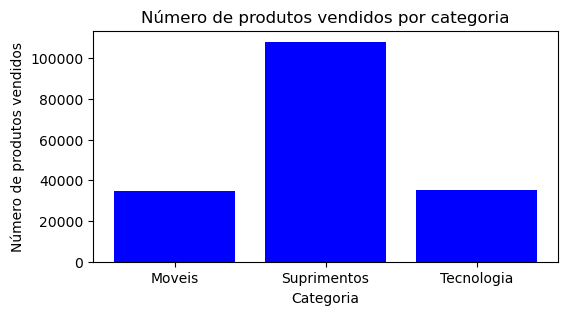

In [24]:
# Gráfico de barras para o número total de produtos vendidos por categoria
plt.figure(figsize=(6, 3))
plt.bar(vendas_por_categoria['Categoria'], vendas_por_categoria['Quantidade_Produtos'], color='blue')
plt.xlabel('Categoria')
plt.ylabel('Número de produtos vendidos')
plt.title('Número de produtos vendidos por categoria')
plt.show()

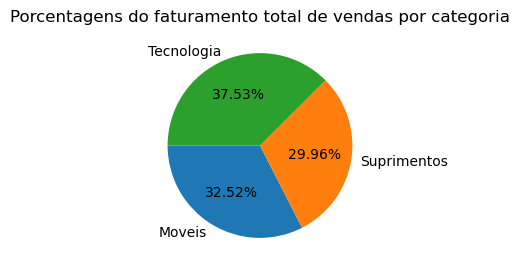

In [25]:
# Gráfico de pizza mostrando a porcentagem de vendas de cada categoria
plt.figure(figsize=(6, 3))
plt.pie(vendas_por_categoria['Valor_Venda'], labels=vendas_por_categoria['Categoria'], autopct='%1.2f%%', startangle=180)
plt.title('Porcentagens do faturamento total de vendas por categoria')
plt.show()

## Conclusão - Objetivo 2

- A Categoria com maior número de produtos vendidos é Suprimentos, com 108.182 produtos vendidos, representando 26.96% do faturamento da empresa.
- A Categoria que se destaca em termos de receita é a Tecnologia, que faturou 4.744.557,50, representando 37.53% do faturamento da empresa.

# Objetivo 3

#### Identificar qual segmento de clientes gerou mais receita e quais regiões têm o melhor desempenho de vendas.

In [26]:
# Identificando os valores de venda para cada segmento
receita_por_segmento = dados.groupby('Segmento').agg({'Valor_Venda': 'sum'}).reset_index()
print(receita_por_segmento)

      Segmento   Valor_Venda
0   Consumidor  6.507949e+06
1  Corporativo  3.824698e+06
2  Home Office  2.309855e+06


In [27]:
# Formatando os valores de 'Valor_Venda' para evitar a notação científica
receita_por_segmento['Valor_Venda'] = receita_por_segmento['Valor_Venda'].map('{:.2f}'.format)

In [28]:
# Vendas para cada segmento
print(receita_por_segmento)

      Segmento Valor_Venda
0   Consumidor  6507949.42
1  Corporativo  3824697.52
2  Home Office  2309854.97


In [29]:
# Encontrando o segmento mais vendido e o total de vendas
segmento_maior_receita = dados.groupby('Segmento')['Valor_Venda'].sum().idxmax()
vendas_segmento_maior = dados.groupby('Segmento')['Valor_Venda'].sum().max()
vendas_segmento_maior = int(vendas_segmento_maior)

In [30]:
print("O Segmento de Cliente que gerou mais receita para a empresa foi", segmento_maior_receita, "com", vendas_segmento_maior, "vendas no total.")

O Segmento de Cliente que gerou mais receita para a empresa foi Consumidor com 6507949 vendas no total.


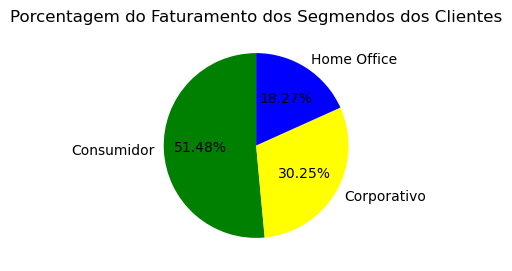

In [31]:
# Demonstração usando Pie Plot
cores = ['green', 'yellow', 'blue']
plt.figure(figsize=(6, 3))
plt.pie(receita_por_segmento['Valor_Venda'], labels=receita_por_segmento['Segmento'], autopct='%1.2f%%', startangle=90, colors=cores)
plt.title('Porcentagem do Faturamento dos Segmendos dos Clientes')
plt.show()

In [32]:
# Listando regiões com melhor desempenho de vendas
regioes_maior_venda = dados.groupby('Regiao')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False)
regioes_maior_venda.head(10)

,Regiao,Valor_Venda
313,England,485170.9710
195,California,457687.6315
437,Ile-de-France,317822.5440
705,New York,310876.2710
704,New South Wales,270487.1040
822,Queensland,238312.7340
724,North Rhine-Westphalia,216451.8510
986,Texas,170188.0458
871,San Salvador,153639.3970
691,National Capital,152175.3555


## Conclusão - Objetivo 3

- Segmento com maior número de vendas: Consumidor - 6507949 vendas no total.
- Regiões com melhor desempenho de vendas: England, California, Ile-de-France.